In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [17]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [21]:
# Find the most recent date in the data set.
recent = session.query(func.max(measurement.date)).first()[0]

print(f"The most recent date in the dataset is {recent}")

The most recent date in the dataset is 2017-08-23


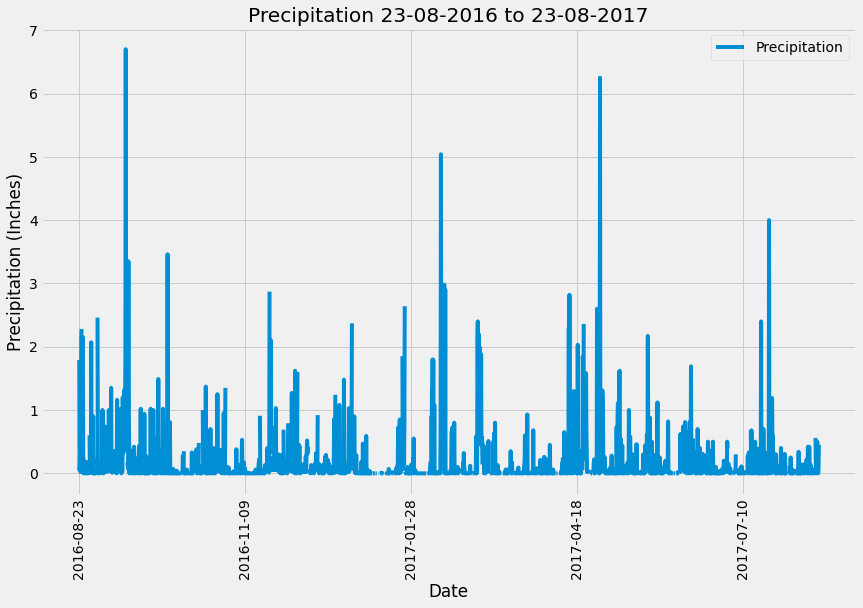

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = dt.date(2017,8,23)

# Calculate the date one year from the last date in data set.
one_year_date = recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
query1 = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
results = pd.DataFrame(query1, columns=['Date', 'Precipitation'])
results.set_index('Date', inplace=True)

# Sort the dataframe by date
results = results.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
results.plot(rot = 90, figsize = (13, 8))
plt.xlabel('Date')
plt.ylabel('Precipitation (Inches)')
plt.title('Precipitation 23-08-2016 to 23-08-2017')
plt.show()



In [28]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [29]:
# Design a query to calculate the total number stations in the dataset
stations_num = session.query(station).count()
stations_num

9

In [30]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.id)).\
                  group_by(measurement.station).order_by(func.count(measurement.id).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
print(f"The most active station id is {active_stations[0][0]}.")

The most active station id is USC00519281.


In [32]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_list = [measurement.station, 
      func.min(measurement.tobs),
      func.max(measurement.tobs),
      func.avg(measurement.tobs)]

query2 = session.query(*temp_list).filter_by(station = 'USC00519281').all()

print(f"The lowest temperature is {query2[0][1]}.")
print(f"The highest temperature is {query2[0][2]}.")
print(f"The average temperature is {query2[0][3]}.")

The lowest temperature is 54.0.
The highest temperature is 85.0.
The average temperature is 71.66378066378067.


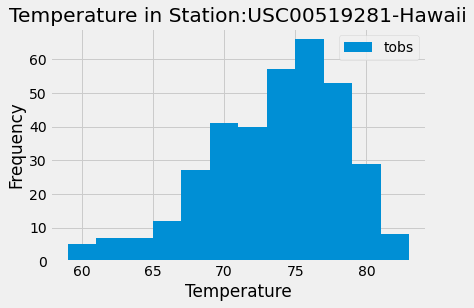

In [38]:
# Using the most active station id
active_station_year = session.query(measurement.date, measurement.tobs).filter_by(station = 'USC00519281').\
                      filter(measurement.date >= one_year_date).all() 

station_df = pd.DataFrame(active_station_year)

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_df.plot(kind = 'hist', bins = 12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title(f'Temperature in Station:USC00519281-Hawaii')
plt.show()

# Close session

In [36]:
# Close Session
session.close()